# EN3160 Assignment 01

## Question 1

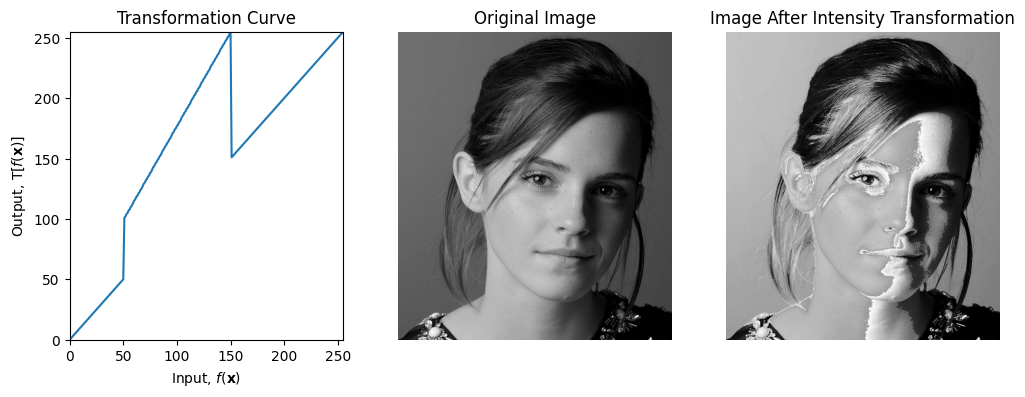

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

c = np.array([(50, 50), (50, 100), (150, 255), (150, 150), (255, 255)])

t1 = np.linspace(0, c[0, 1], c[0, 0] + 1 - 0).astype('uint8')
t2 = np.linspace(c[0, 1] + 1, c[1, 1], c[1, 0] - c[0, 0]).astype('uint8')
t3 = np.linspace(c[1, 1] + 1, c[2, 1], c[2, 0] - c[1, 0]).astype('uint8')
t4 = np.linspace(c[2, 1] + 1, c[3, 1], c[3, 0] - c[2, 0]).astype('uint8')
t5 = np.linspace(c[3, 1] + 1, c[4, 1], c[4, 0] - c[3, 0]).astype('uint8')

transform = np.concatenate((t1, t2, t3, t4, t5)).astype('uint8')

img_orig = cv.imread("C:/Users/ASUS/Desktop/EN3160_A01/a1images/emma.jpg", cv.IMREAD_GRAYSCALE)

img_transformed = cv.LUT(img_orig, transform).astype('uint8')  
    
# Plot the transformation curve
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(transform)
plt.title("Transformation Curve")
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.xlabel(r'Input, $f(\mathbf{x})$')
plt.ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')

# Display original image
plt.subplot(132)
plt.imshow(img_orig, cmap="gray")
plt.title('Original Image')
plt.axis('off')

# Display transformed image
plt.subplot(133)
plt.imshow(img_transformed, cmap="gray")
plt.title('Image After Intensity Transformation')
plt.axis('off')

plt.show()


## Question 2

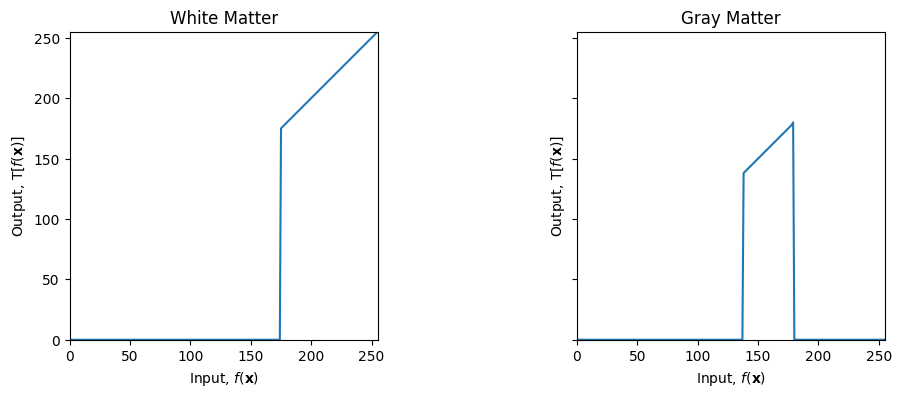

Text(0.5, 1.0, 'Gray Matter')

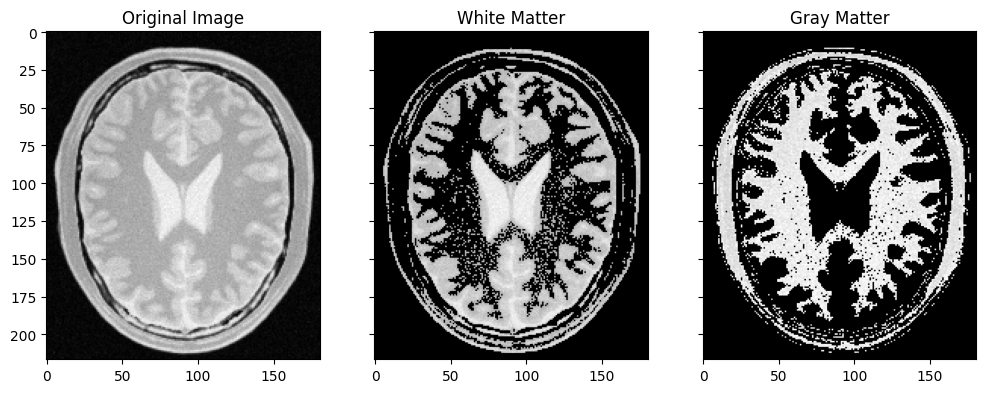

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img_orig = cv.imread("C:/Users/ASUS/Desktop/EN3160_A01/a1images/brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)

white_threshold_upper = 255
white_threshold_lower = 175
white_matter = np.linspace(0, 255, 256, dtype='uint8')
white_matter[:white_threshold_lower] = 0
white_matter[white_threshold_lower:] = np.linspace(white_threshold_lower, white_threshold_upper, white_threshold_upper - white_threshold_lower + 1, dtype='uint8')

gray_threshold_upper = 180
gray_threshold_lower = 138
gray_matter = np.linspace(0, 255, 256, dtype='uint8')
gray_matter[:gray_threshold_lower] = 0
gray_matter[gray_threshold_upper:] = 0
gray_matter[gray_threshold_lower:gray_threshold_upper] = np.linspace(gray_threshold_lower, gray_threshold_upper, gray_threshold_upper - gray_threshold_lower, dtype='uint8')

white_transform = cv.LUT(img_orig, white_matter)
gray_transform = cv.LUT(img_orig, gray_matter)


fig, ax = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(12,4))

ax[0].plot(white_matter)
ax[0].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[0].set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[0].set_xlim(0, 255)
ax[0].set_ylim(0, 255)
ax[0].set_aspect('equal')
ax[0].set_title('White Matter')


ax[1].plot(gray_matter)
ax[1].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[1].set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[1].set_xlim(0, 255)
ax[1].set_ylim(0, 255)
ax[1].set_aspect('equal')
ax[1].set_title('Gray Matter')

plt.show()

fig, ax = plt.subplots(1, 3, sharex='all', sharey='all', figsize=(12,6))

ax[0].imshow(img_orig, cmap="gray")
ax[0].set_title('Original Image')

ax[1].imshow(white_transform, cmap="gray")
ax[1].set_title('White Matter')

ax[2].imshow(gray_transform, cmap="gray")
ax[2].set_title('Gray Matter')

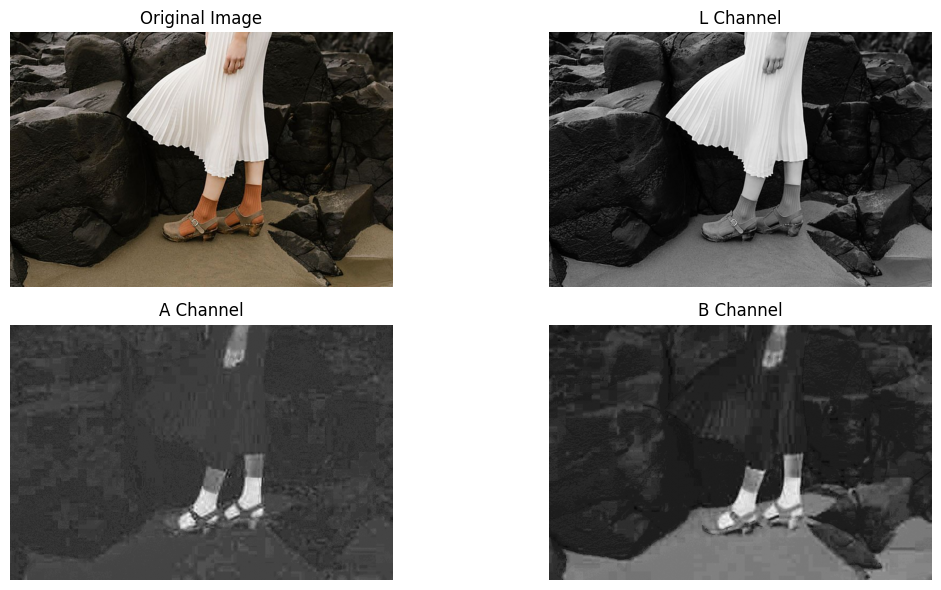

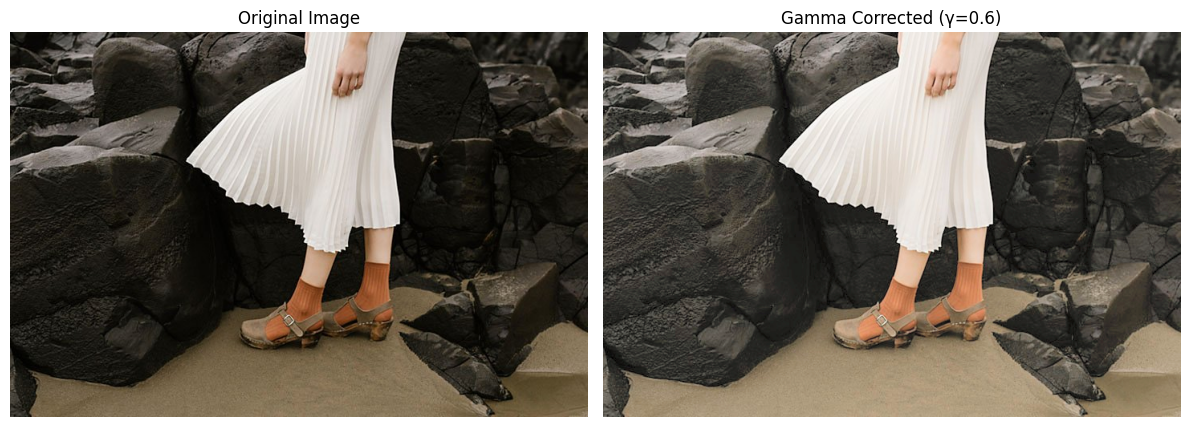

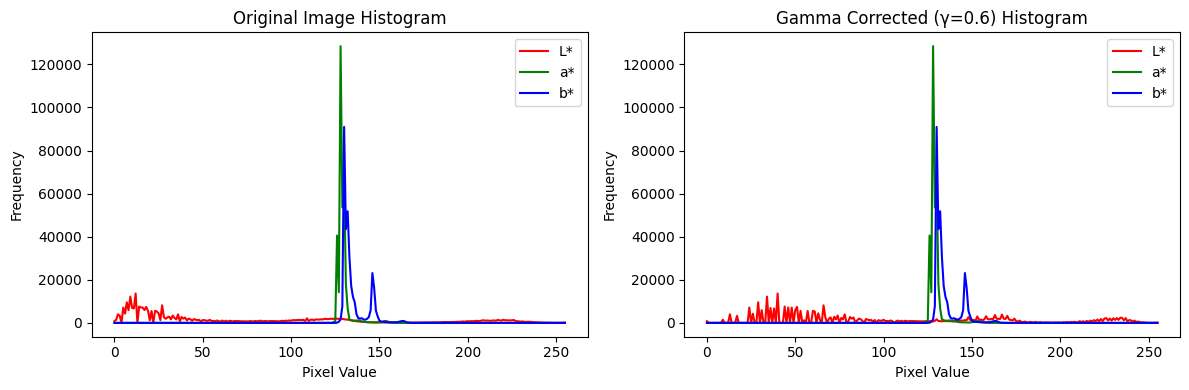

In [13]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread("C:/Users/ASUS/Desktop/EN3160_A01/a1images/highlights_and_shadows.jpg", cv.IMREAD_COLOR)
img_rgb = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
img_lab = cv.cvtColor(img_orig, cv.COLOR_BGR2Lab) 
l_channel, a_channel, b_channel = cv.split(img_lab)

gamma = 0.6
table = np.array([((i / 255.0) ** (gamma)) * 255 for i in range(256)]).astype('uint8')
l_corrected = cv.LUT(l_channel, table)

img_gamma = cv.merge((l_corrected, a_channel, b_channel))
img_corrected = cv.cvtColor(img_gamma, cv.COLOR_Lab2RGB)

plt.figure(figsize=(12, 6))
plt.subplot(221), plt.imshow(img_rgb), plt.title('Original Image'), plt.axis('off')
plt.subplot(222), plt.imshow(l_channel, cmap="gray"), plt.title('L Channel'), plt.axis('off')
plt.subplot(223), plt.imshow(a_channel, cmap="gray"), plt.title('A Channel'), plt.axis('off')
plt.subplot(224), plt.imshow(b_channel, cmap="gray"), plt.title('B Channel'), plt.axis('off')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(img_rgb), plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(img_corrected), plt.title(f'Gamma Corrected (γ={gamma})'), plt.axis('off')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
colors = ('r', 'g', 'b')
channel_names = ('L*', 'a*', 'b*')

plt.subplot(121)
for i, color in enumerate(colors):
    hist = cv.calcHist([img_lab], [i], None, [256], [0, 256])
    plt.plot(hist, color=color, label=channel_names[i])
plt.title('Original Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(122)
for i, color in enumerate(colors):
    hist = cv.calcHist([img_gamma], [i], None, [256], [0, 256])
    plt.plot(hist, color=color, label=channel_names[i])
plt.title(f'Gamma Corrected (γ={gamma}) Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


## Question 4

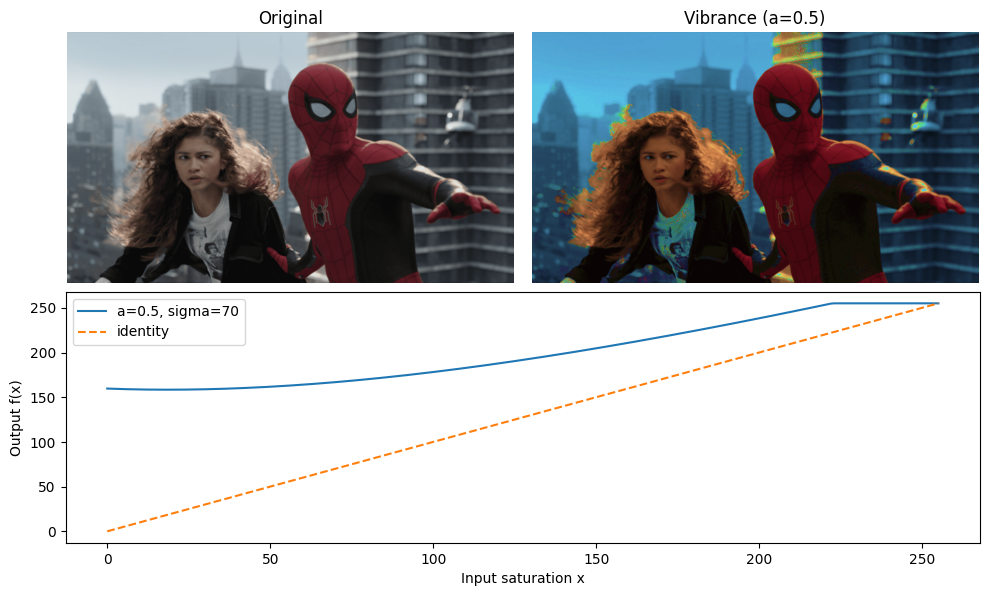

In [24]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_bgr = cv.imread("C:/Users/ASUS/Desktop/EN3160_A01/a1images/spider.png", cv.IMREAD_COLOR)
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
img_hsv = cv.cvtColor(img_bgr, cv.COLOR_BGR2HSV).astype(np.float32)
h, s, v = cv.split(img_hsv)

sigma = 70
def vibrance_transform(s_channel, a):
    x = s_channel
    gauss = a * 128.0 * np.exp(-((x - 128.0)*2) / (2.0 * sigma*2))
    out = x + gauss
    out = np.clip(out, 0, 255)
    return out

# I choosed a=0.5
a = 0.5
s_enh = vibrance_transform(s, a)

hsv_enh = cv.merge((h, s_enh, v)).astype(np.uint8)
img_bgr_enh = cv.cvtColor(hsv_enh, cv.COLOR_HSV2BGR)
img_rgb_enh = cv.cvtColor(img_bgr_enh, cv.COLOR_BGR2RGB)

xs = np.arange(256)
ys = np.minimum(xs + a * 128.0 * np.exp(-((xs - 128.0)*2) / (2.0 * sigma*2)), 255)

plt.figure(figsize=(10,6))
plt.subplot(2,2,1); plt.imshow(img_rgb); plt.title('Original'); plt.axis('off')
plt.subplot(2,2,2); plt.imshow(img_rgb_enh); plt.title(f'Vibrance (a={a})'); plt.axis('off')
plt.subplot(2,1,2)
plt.plot(xs, ys, label=f'a={a}, sigma={sigma}')
plt.plot(xs, xs, '--', label='identity')
plt.xlabel('Input saturation x')
plt.ylabel('Output f(x)')
plt.legend()
plt.tight_layout()
plt.show()


## Question 5

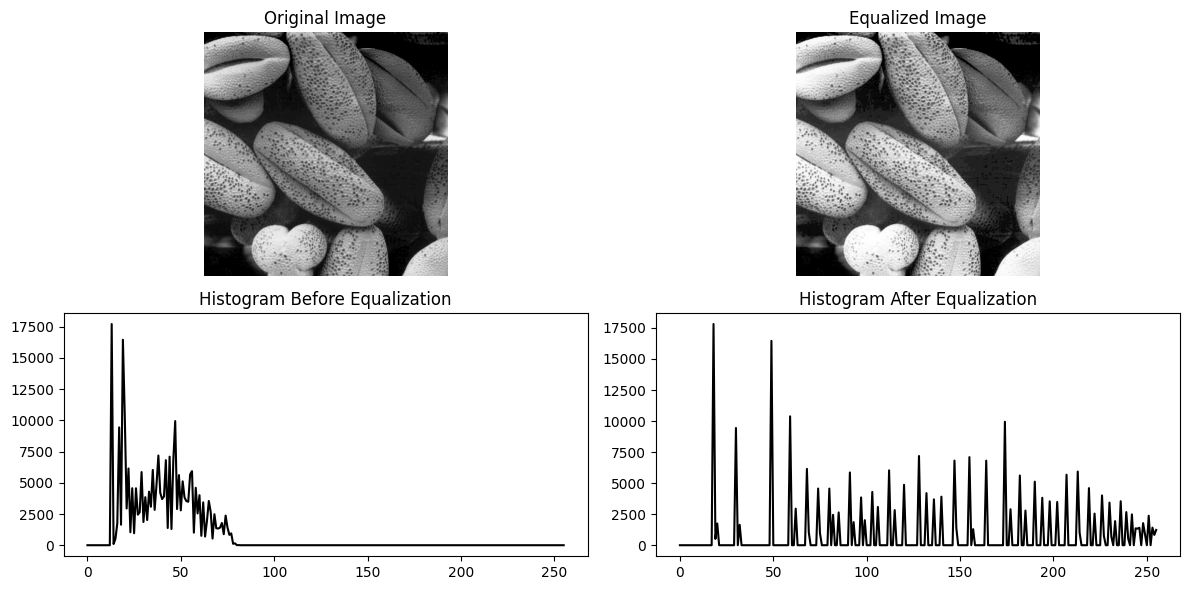

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def my_histogram_equalization(gray_img):
    # Step 1: Flatten the image
    flat = gray_img.flatten()
    
    # Step 2: Calculate histogram
    hist = np.bincount(flat, minlength=256)
    
    # Step 3: Normalize the histogram (probability)
    pdf = hist / np.sum(hist)
    
    # Step 4: Compute the cumulative distribution function (CDF)
    cdf = np.cumsum(pdf)
    
    # Step 5: Scale CDF to [0, 255]
    cdf_scaled = np.round(cdf * 255).astype(np.uint8)
    
    # Step 6: Map the original image pixels using the equalized values
    equalized_img = cdf_scaled[flat].reshape(gray_img.shape)
    
    return equalized_img, hist, np.bincount(equalized_img.flatten(), minlength=256)

img = cv2.imread("C:/Users/ASUS/Desktop/EN3160_A01/a1images/shells.tif", cv2.IMREAD_GRAYSCALE)
equalized_img, hist_before, hist_after = my_histogram_equalization(img)

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title("Equalized Image")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.plot(hist_before, color='black')
plt.title("Histogram Before Equalization")

plt.subplot(2, 2, 4)
plt.plot(hist_after, color='black')
plt.title("Histogram After Equalization")

plt.tight_layout()
plt.show()


## Question 6

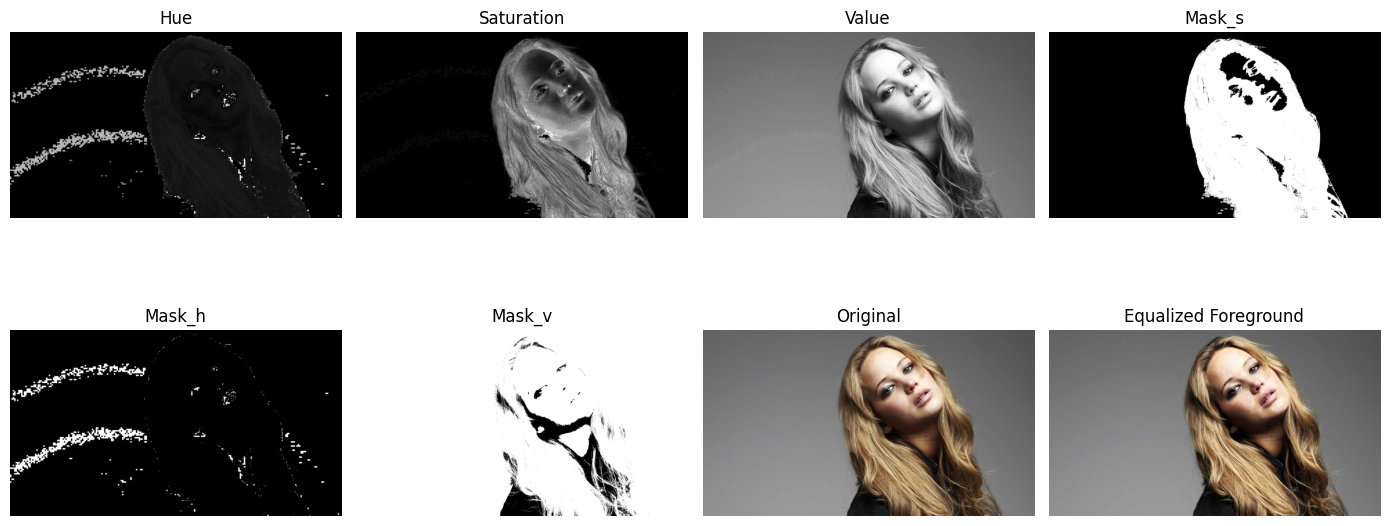

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# (a) Load image and split into HSV channels
img = cv2.imread("C:/Users/ASUS/Desktop/EN3160_A01/a1images/jeniffer.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

# (b) Threshold appropriate channel for foreground mask (using Saturation channel)
_, mask1 = cv2.threshold(s, 50, 255, cv2.THRESH_BINARY)  # appropriate mask
_, mask2 = cv2.threshold(h, 50, 255, cv2.THRESH_BINARY)
_, mask3 = cv2.threshold(v, 50, 255, cv2.THRESH_BINARY)

# (c) Get only foreground and compute histogram
foreground = cv2.bitwise_and(v, v, mask=mask1)
hist, _ = np.histogram(foreground.flatten(), 256, [0, 256])

# (d) Cumulative sum
cdf = hist.cumsum()

# (e) Manual histogram equalization
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')
equalized_foreground = cdf_final[foreground]

# (f) Combine equalized foreground with background
background = cv2.bitwise_and(v, v, mask=cv2.bitwise_not(mask1))
v_equalized = cv2.add(background, equalized_foreground)
hsv_equalized = cv2.merge((h, s, v_equalized))
result = cv2.cvtColor(hsv_equalized, cv2.COLOR_HSV2BGR)

images = [
    (h, "Hue"),
    (s, "Saturation"),
    (v, "Value"),
    (mask1, "Mask_s"),
    (mask2, "Mask_h"),
    (mask3, "Mask_v"),
    (cv2.cvtColor(img, cv2.COLOR_BGR2RGB), "Original"),
    (cv2.cvtColor(result, cv2.COLOR_BGR2RGB), "Equalized Foreground")
]

fig, axes = plt.subplots(2, 4, figsize=(14, 7))
for ax, (image, title) in zip(axes.flat, images):
    if len(image.shape) == 2: 
        ax.imshow(image, cmap='gray')
    else:  # color
        ax.imshow(image)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()
